# Item Sales Prediction

## Common Imports

In [1]:
!pip install opendatasets
!pip install python-dotenv

In [2]:
%load_ext dotenv
%dotenv

In [286]:
import matplotlib.pyplot as plt
import numpy as np
import os
import opendatasets as od 
import pandas as pd
import seaborn as sns

sns.set_palette("viridis")

## Data

### Load the data from Kaggle

In [287]:
KAGGLE_USER=os.getenv("KAGGLE_USER_NAME")
KAGGLE_API=os.getenv("KAGGLE_API_KEY")

In [288]:
od.download("https://www.kaggle.com/datasets/sushantbmujagule/big-sales-prediction-dataset/data/Big Sales Data.csv")

Skipping, found downloaded files in "./big-sales-prediction-dataset" (use force=True to force download)


In [289]:
dataset = pd.read_csv("big-sales-prediction-dataset/Big Sales Data.csv")
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


### Data Exploration

In [290]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [291]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [292]:
dataset.isna().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [293]:
# create a copy to perform data transformations
data = dataset.copy(deep=True)

#### Target Column: Item_Outlet_Sales

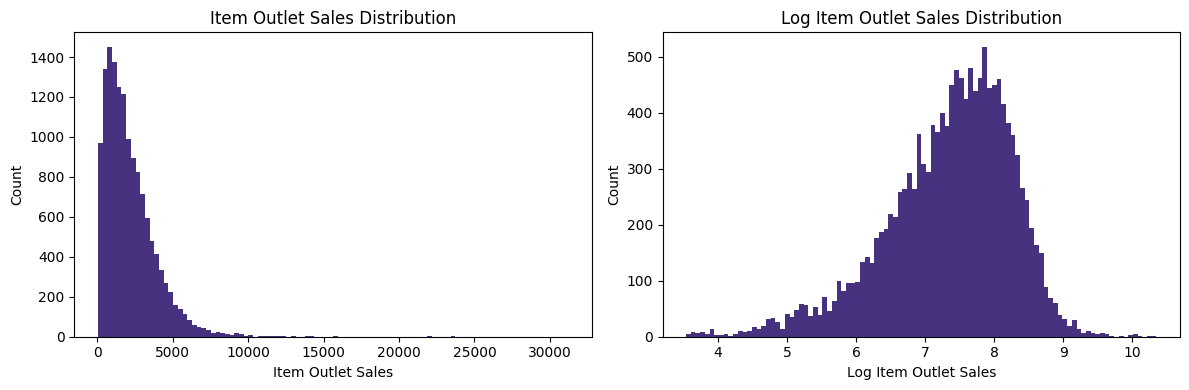

In [294]:
# apply log transformation to the target feature
data["Item_Outlet_Sales_log"] = data["Item_Outlet_Sales"].apply(np.log1p)

_, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(data["Item_Outlet_Sales"], bins=100, )
ax[1].hist(data["Item_Outlet_Sales_log"], bins=100)
ax[0].set_title("Item Outlet Sales Distribution")
ax[1].set_title("Log Item Outlet Sales Distribution")
ax[0].set_xlabel("Item Outlet Sales")
ax[1].set_xlabel("Log Item Outlet Sales")
ax[0].set_ylabel("Count")
ax[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

#### Item_Identifier

In [295]:
item_ids = data.loc[:, "Item_Identifier"].unique()
print("Number of unique item identifiers:", len(item_ids))
print("Item identifiers sample:\n", item_ids[:30])

Number of unique item identifiers: 1559
Item identifiers sample:
 ['FDT36' 'FDP12' 'FDQ36' 'FDW23' 'FDM60' 'FDR36' 'FDO60' 'FDK24' 'FDL48'
 'FDK36' 'FDW24' 'FDP36' 'FDY12' 'FDI48' 'FDY24' 'FDN24' 'FDL12' 'FDI60'
 'FDY11' 'FDY36' 'FDK48' 'FDT24' 'FDR60' 'FDV48' 'FDX60' 'FDW48' 'FDC48'
 'FDF24' 'FDG24' 'FDH48']


#### Item_Weight

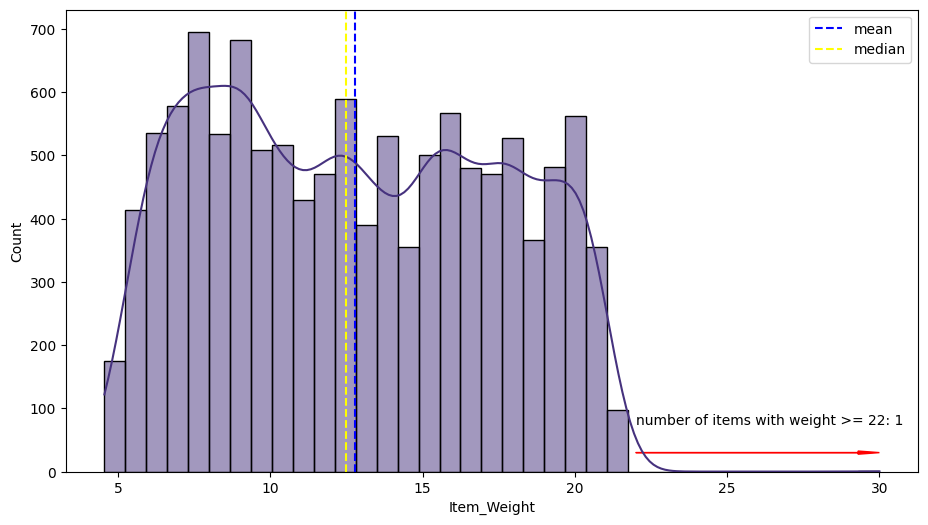

In [296]:
plt.figure(figsize=(11, 6))
sns.histplot(data, x="Item_Weight", kde=True)
plt.axvline(data["Item_Weight"].mean(), color="b", linestyle="--", label="mean")
plt.axvline(data["Item_Weight"].median(), color="yellow", linestyle="--", label="median")
plt.legend()
plt.arrow(22, 30, 8, 0, width=0.01, color="r", length_includes_head=True, head_width=5, head_length=0.7)
plt.text(22, 75, f"number of items with weight >= 22: {len(data[data.loc[:, 'Item_Weight'] >= 22])}")
plt.show()

In [297]:
data.loc[data["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_log
269,FDH48,NaN,Low Fat,0.105893,Baking Goods,86.2540,OUT019,1985,Small,Tier 1,Grocery Store,519.324000,6.254452
272,FDS24,NaN,Regular,0.108947,Baking Goods,86.5514,OUT019,1985,Small,Tier 1,Grocery Store,794.435600,6.678890
279,FDS24,NaN,Regular,0.061923,Baking Goods,87.5514,OUT027,1985,Medium,Tier 3,Supermarket Type3,1413.871780,7.254794
280,FDC60,NaN,Regular,0.113918,Baking Goods,87.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,772.058409,6.650355
287,FDL36,NaN,Low Fat,0.075707,Baking Goods,88.1830,OUT027,1985,Medium,Tier 3,Supermarket Type3,1438.128000,7.271793
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14176,FDF11,NaN,Regular,0.000000,Starchy Foods,238.3538,OUT027,1985,Medium,Tier 3,Supermarket Type3,11917.690000,9.385863
14188,FDD11,NaN,Low Fat,0.053606,Starchy Foods,252.4040,OUT019,1985,Small,Tier 1,Grocery Store,4708.507347,8.457339
14192,FDD11,NaN,Low Fat,0.030468,Starchy Foods,254.7040,OUT027,1985,Medium,Tier 3,Supermarket Type3,3036.048000,8.018641
14197,FDG47,NaN,Low Fat,0.121894,Starchy Foods,261.3252,OUT019,1985,Small,Tier 1,Grocery Store,2143.879527,7.670839


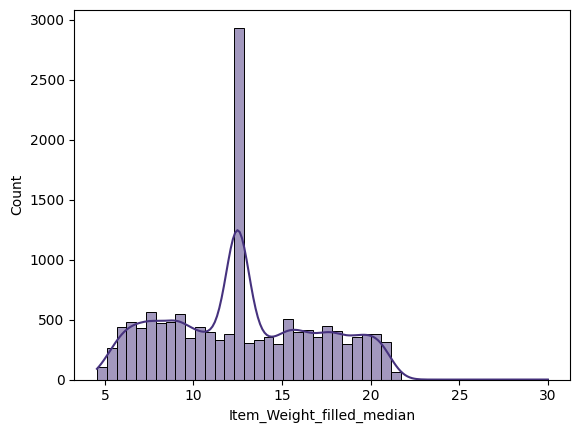

In [298]:
# fill NaNs weights with weights median value which is closer to the peak
data["Item_Weight_filled_median"] = data["Item_Weight"].fillna(data["Item_Weight"].median())
# plot hte resulting distribution
sns.histplot(data, x="Item_Weight_filled_median", kde=True)
plt.show()

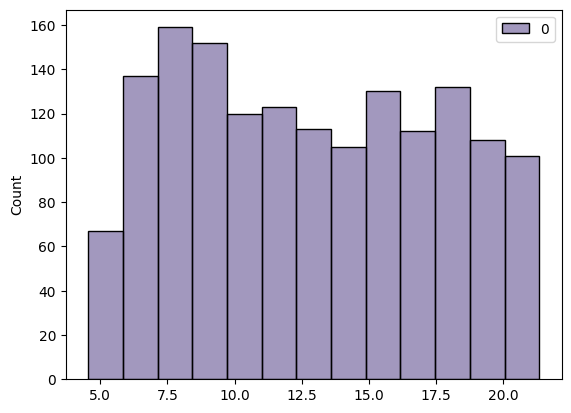

In [299]:
# compute median and mean item weights by item identifier and item type 
replace_dict_id = data.groupby("Item_Identifier")["Item_Weight"].agg(["mean", "median"]).to_dict()
replace_dict_type = data.groupby("Item_Type")["Item_Weight"].agg(["mean", "median"]).to_dict()
# items median weights distribution grouped by item identifier
sns.histplot(replace_dict_id["mean"].values())
plt.show()

In [300]:
data["Item_Weight_filled_by_type"] = data["Item_Weight"].fillna(data["Item_Type"].map(replace_dict_type["mean"]))
data["Item_Weight_filled_by_id"] = data["Item_Weight"].fillna(data["Item_Identifier"].map(replace_dict_id["mean"]))

In [301]:
data[["Item_Outlet_Sales", "Item_Weight", "Item_Weight_filled_median", "Item_Weight_filled_by_id", "Item_Weight_filled_by_type"]].corr()

,Item_Outlet_Sales,Item_Weight,Item_Weight_filled_median,Item_Weight_filled_by_id,Item_Weight_filled_by_type
Item_Outlet_Sales,1.000000,0.228297,0.155303,0.145037,0.160823
Item_Weight,0.228297,1.000000,1.000000,1.000000,1.000000
Item_Weight_filled_median,0.155303,1.000000,1.000000,0.911525,0.998121
Item_Weight_filled_by_id,0.145037,1.000000,0.911525,1.000000,0.913174
Item_Weight_filled_by_type,0.160823,1.000000,0.998121,0.913174,1.000000


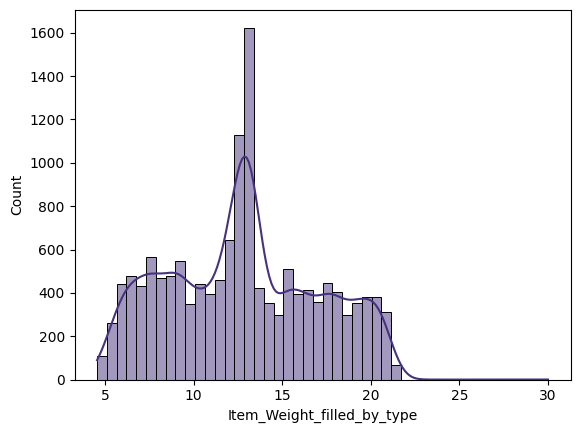

In [302]:
sns.histplot(data, x="Item_Weight_filled_by_type", kde=True)
plt.show()

#### Item_Fat_Content

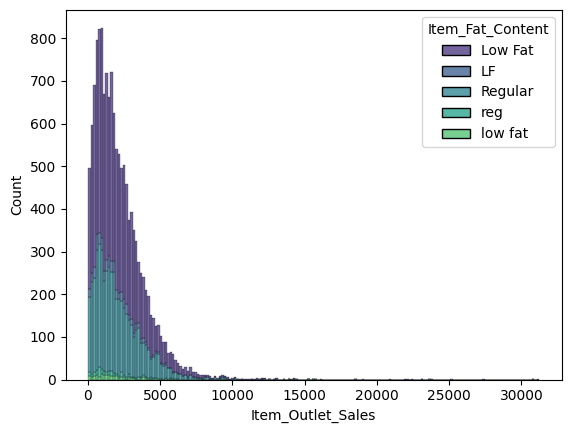

In [303]:
sns.histplot(hue="Item_Fat_Content", x="Item_Outlet_Sales", multiple="stack", data=data)
plt.show()

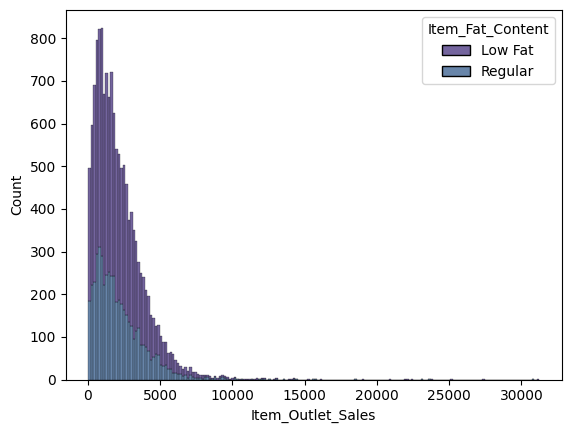

In [304]:
data["Item_Fat_Content"] = data.loc[:, "Item_Fat_Content"].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"})
sns.histplot(hue="Item_Fat_Content", x="Item_Outlet_Sales", multiple="stack", data=data)
plt.show()

#### Item_Visibility

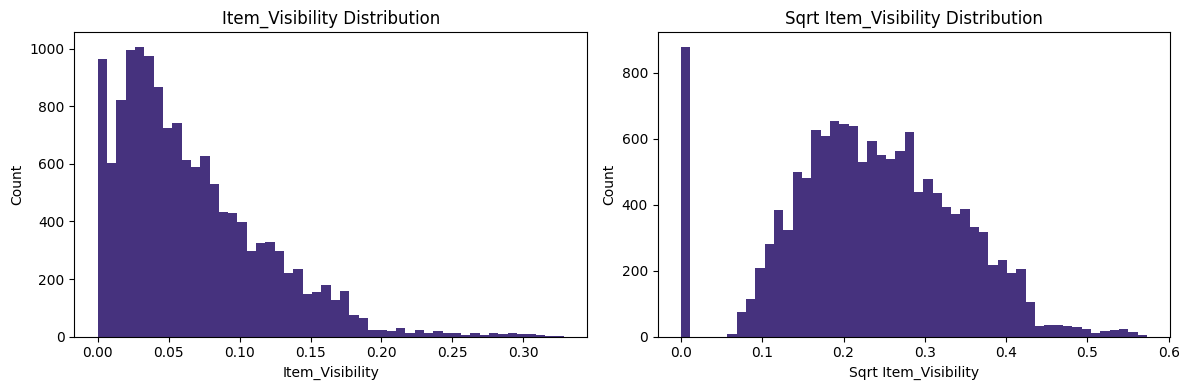

In [305]:
data["Item_Visibility_sqrt"] = data["Item_Visibility"].map(np.sqrt)

_, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(data["Item_Visibility"], bins=50)
ax[1].hist(data["Item_Visibility_sqrt"], bins=50)
ax[0].set_title("Item_Visibility Distribution")
ax[1].set_title("Sqrt Item_Visibility Distribution")
ax[0].set_xlabel("Item_Visibility")
ax[1].set_xlabel("Sqrt Item_Visibility")
ax[0].set_ylabel("Count")
ax[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

#### Item_Type

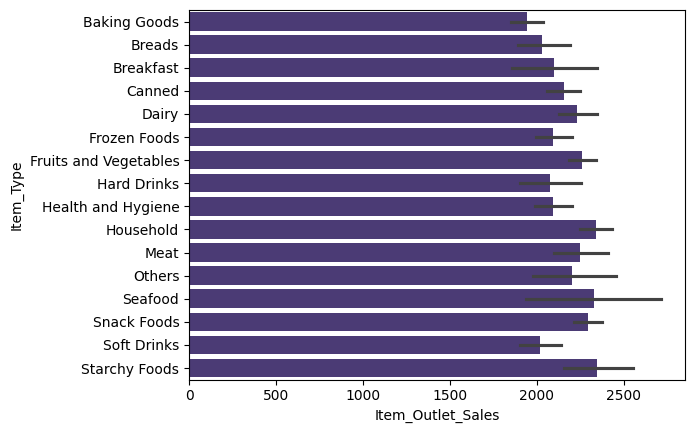

In [306]:
sns.barplot(data, y="Item_Type", x="Item_Outlet_Sales")
plt.show()

#### Item_MRP

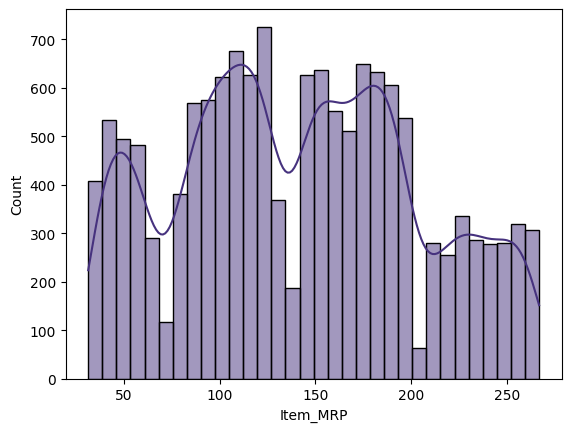

In [307]:
sns.histplot(x="Item_MRP", data=data, kde=True)
plt.show()

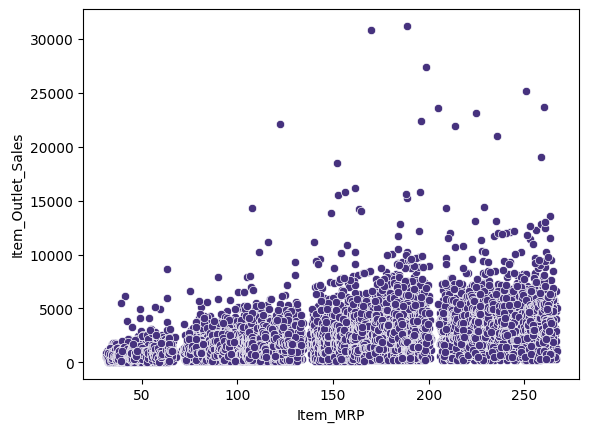

In [308]:
sns.scatterplot(data, y="Item_Outlet_Sales", x="Item_MRP")
plt.show()

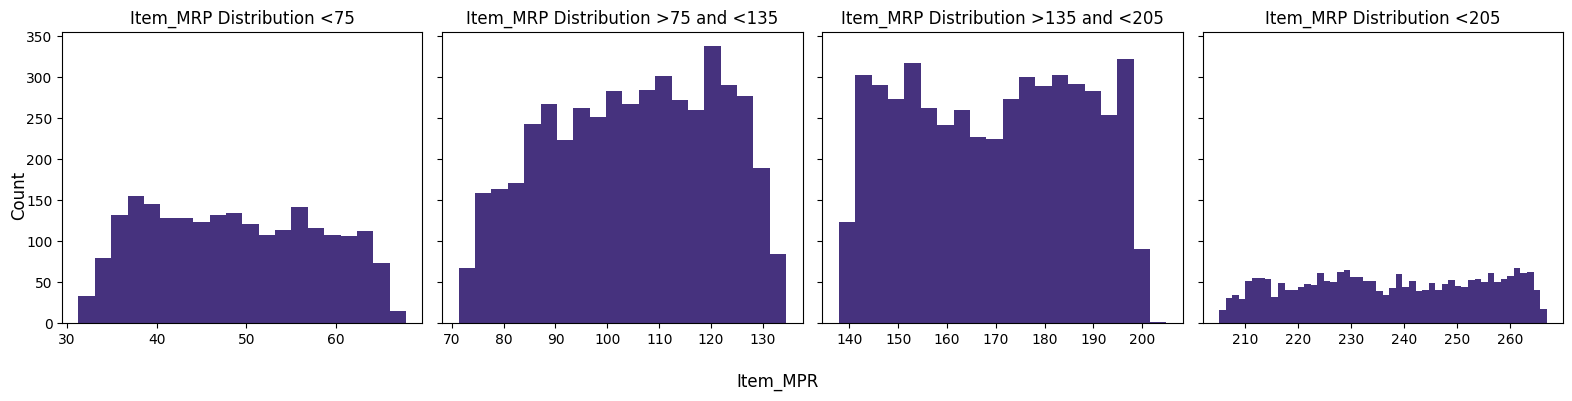

In [309]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
ax[0].hist(data.loc[data.loc[:, "Item_MRP"] <= 70, "Item_MRP"], bins=20)
ax[1].hist(data.loc[(data.loc[:, "Item_MRP"] > 70) & (data.loc[:, "Item_MRP"] <= 135), "Item_MRP"], bins=20)
ax[2].hist(data.loc[(data.loc[:, "Item_MRP"] > 135) & (data.loc[:, "Item_MRP"] <= 205), "Item_MRP"], bins=20)
ax[3].hist(data.loc[data.loc[:, "Item_MRP"] > 205, "Item_MRP"], bins=50)
ax[0].set_title("Item_MRP Distribution <75")
ax[1].set_title("Item_MRP Distribution >75 and <135")
ax[2].set_title("Item_MRP Distribution >135 and <205")
ax[3].set_title("Item_MRP Distribution <205")
fig.supxlabel("Item_MPR")
fig.supylabel("Count")
plt.tight_layout()
plt.show()

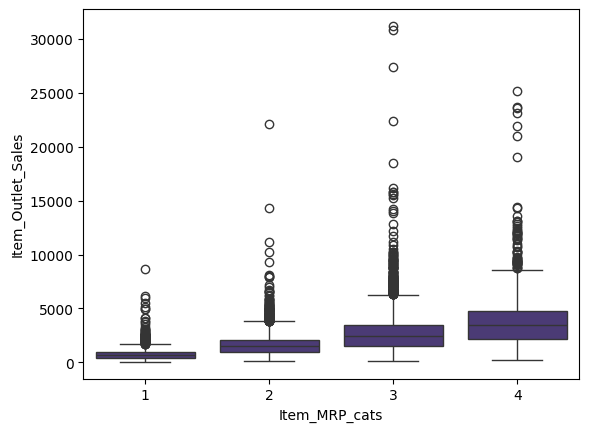

In [310]:
# create MPR categories
data["Item_MRP_cats"] = pd.cut(data.loc[:, "Item_MRP"], bins=[0, 75, 135, 205, 300], labels=[1, 2, 3, 4])
sns.boxplot(data, y="Item_Outlet_Sales", x="Item_MRP_cats")
plt.show()

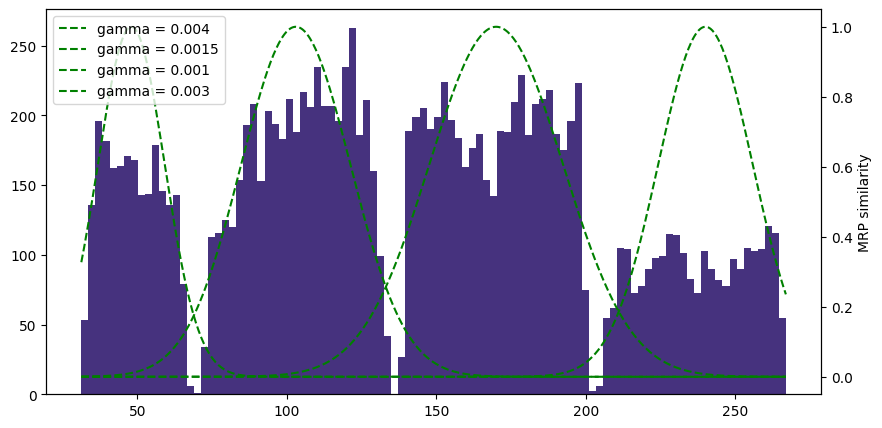

In [311]:
# transform Item_MRP using RBF kernels
from sklearn.metrics.pairwise import rbf_kernel

mrps = np.linspace(data["Item_MRP"].min(),
                   data["Item_MRP"].max(),
                   500).reshape(-1, 1)

simil_48 = rbf_kernel(mrps, [[48]], gamma=0.004)
simil_103 = rbf_kernel(mrps, [[103]], gamma=0.0015)
simil_165 = rbf_kernel(mrps, [[170]], gamma=0.001)
simil_240 = rbf_kernel(mrps, [[240]], gamma=0.002)

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.hist(data["Item_MRP"], bins=100)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "black"
ax2.plot(mrps, simil_48, color="g", label="gamma = 0.004", linestyle="--")
ax2.plot(mrps, simil_103, color="g", label="gamma = 0.0015", linestyle="--")
ax2.plot(mrps, simil_165, color="g", label="gamma = 0.001", linestyle="--")
ax2.plot(mrps, simil_240, color="g", label="gamma = 0.003", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("MRP similarity", color=color)

plt.legend(loc="upper left")
plt.show()

In [312]:
# add new features to the data
data[["MRP48_simil"]] = rbf_kernel(data[["Item_MRP"]], [[48]], gamma=0.004)
data[["MRP103_simil"]] = rbf_kernel(data[["Item_MRP"]], [[103]], gamma=0.0015)
data[["MRP170_simil"]] = rbf_kernel(data[["Item_MRP"]], [[170]], gamma=0.001)
data[["MRP240_simil"]] = rbf_kernel(data[["Item_MRP"]], [[240]], gamma=0.002)

In [313]:
data[["MRP48_simil", "MRP103_simil", "MRP170_simil", "MRP240_simil", "Item_Outlet_Sales_log"]].corr()

,MRP48_simil,MRP103_simil,MRP170_simil,MRP240_simil,Item_Outlet_Sales_log
MRP48_simil,1.000000,-0.258204,-0.325821,-0.170575,-0.450774
MRP103_simil,-0.258204,1.000000,-0.452605,-0.284431,-0.149048
MRP170_simil,-0.325821,-0.452605,1.000000,-0.287078,0.258566
MRP240_simil,-0.170575,-0.284431,-0.287078,1.000000,0.298438
Item_Outlet_Sales_log,-0.450774,-0.149048,0.258566,0.298438,1.000000


#### Outlet_Identifier

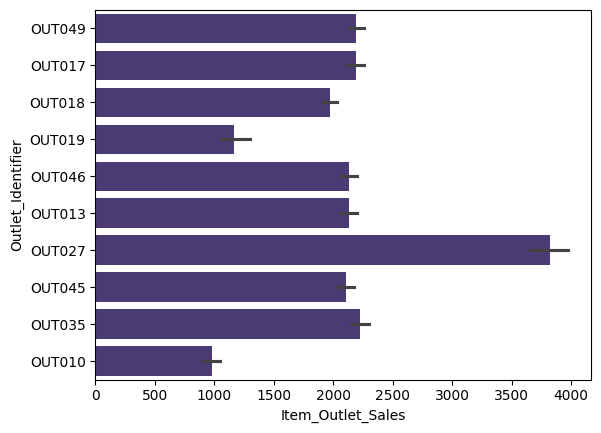

In [314]:
sns.barplot(data, y="Outlet_Identifier", x="Item_Outlet_Sales")
plt.show()

#### Outlet_Establishment_Year

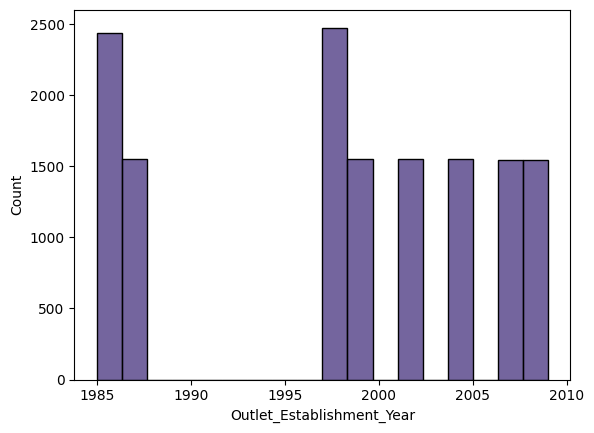

In [315]:
sns.histplot(x="Outlet_Establishment_Year", data=data)
plt.show()

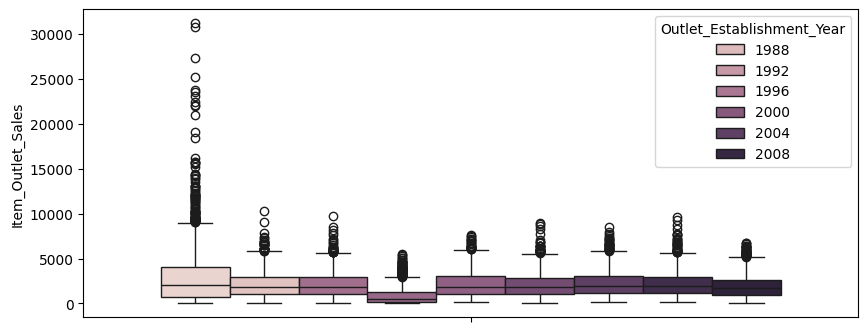

In [316]:
plt.figure(figsize=(10, 4))
sns.boxplot(hue="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=data)
plt.show()

#### Outlet_Size

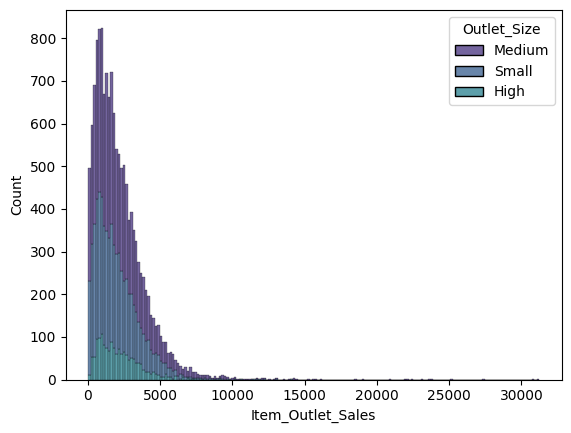

In [317]:
sns.histplot(x="Item_Outlet_Sales", hue="Outlet_Size", multiple="stack", data=data)
plt.show()

#### Outlet_Location_Type

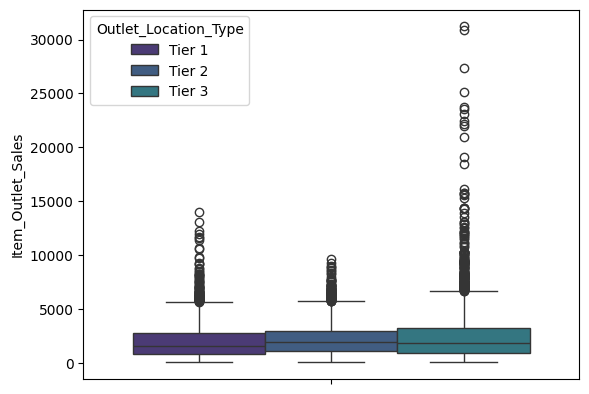

In [318]:
sns.boxplot(y="Item_Outlet_Sales", hue="Outlet_Location_Type", data=data)
plt.show()

#### Outlet_Type

<Axes: xlabel='count', ylabel='Outlet_Type'>

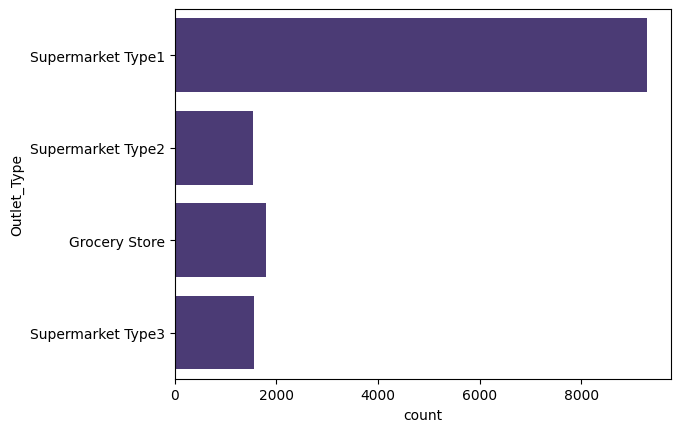

In [319]:
sns.countplot(data, y="Outlet_Type")

#### Correlations

In [320]:
print(data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Outlet_Sales_log',
       'Item_Weight_filled_median', 'Item_Weight_filled_by_type',
       'Item_Weight_filled_by_id', 'Item_Visibility_sqrt', 'Item_MRP_cats',
       'MRP48_simil', 'MRP103_simil', 'MRP170_simil', 'MRP240_simil'],
      dtype='object')


In [321]:
data.corr(numeric_only=True)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Outlet_Sales_log,Item_Weight_filled_median,Item_Weight_filled_by_type,Item_Weight_filled_by_id,Item_Visibility_sqrt,MRP48_simil,MRP103_simil,MRP170_simil,MRP240_simil
Item_Weight,1.000000,-0.016348,0.037288,0.002878,0.228297,0.208287,1.000000,1.000000,1.000000,-0.013348,-0.021101,-0.030947,0.027724,0.022629
Item_Visibility,-0.016348,1.000000,-0.006351,-0.083678,-0.158813,-0.197179,-0.016621,-0.014176,-0.015342,0.949456,0.017546,0.000633,-0.013115,0.009543
Item_MRP,0.037288,-0.006351,1.000000,0.000141,0.532261,0.564208,0.033777,0.034502,0.034644,-0.000711,-0.618500,-0.405076,0.350416,0.646979
Outlet_Establishment_Year,0.002878,-0.083678,0.000141,1.000000,-0.110786,0.017648,0.019592,0.001258,-0.000695,-0.064271,0.000303,0.000325,-0.000284,0.000747
Item_Outlet_Sales,0.228297,-0.158813,0.532261,-0.110786,1.000000,0.822925,0.155303,0.160823,0.145037,-0.149768,-0.330215,-0.223258,0.199455,0.339235
Item_Outlet_Sales_log,0.208287,-0.197179,0.564208,0.017648,0.822925,1.000000,0.171831,0.172065,0.157997,-0.165456,-0.450774,-0.149048,0.258566,0.298438
Item_Weight_filled_median,1.000000,-0.016621,0.033777,0.019592,0.155303,0.171831,1.000000,0.998121,0.911525,-0.013857,-0.018990,-0.028272,0.025112,0.020582
Item_Weight_filled_by_type,1.000000,-0.014176,0.034502,0.001258,0.160823,0.172065,0.998121,1.000000,0.913174,-0.011930,-0.018756,-0.029009,0.025263,0.021289
Item_Weight_filled_by_id,1.000000,-0.015342,0.034644,-0.000695,0.145037,0.157997,0.911525,0.913174,1.000000,-0.009902,-0.021374,-0.029191,0.027216,0.019562
Item_Visibility_sqrt,-0.013348,0.949456,-0.000711,-0.064271,-0.149768,-0.165456,-0.013857,-0.011930,-0.009902,1.000000,0.008518,0.002410,-0.014847,0.012165


## Training Pipeline